<a href="https://colab.research.google.com/github/aujasvit/Transformers/blob/main/Quiz-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 1 - CodeRunner: Regression Rumble

Gradient Decent algorithm is used to optimise our model parameters.

The main idea is that we propagate opposite the direction of the gradient of the cost function at a given hyper parameter w or b.

To understand better, let us get our hands dirty! Below is the code implemented for the linear regression algorithm.

* We generate a regression data using the skikit_learns inbuilt library.
* We generate random weight matrices using the np.random.randn function
* Apply the GD Algorithm
 * Calculate the output of the model.
 * Calculate the error. (Used in the MSE Cost function)
 * Compute the gradient of the Cost function wrt our hyperparameter.
 * Update theta.

Have a look at the code below and fill in the necessary blanks "..."

Note:- Use the Mean Square error as your cost function given as:

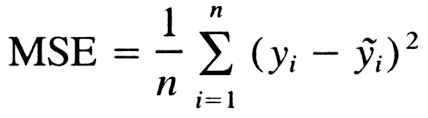

ybar is the predicted output.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# sklearn.datasets.make_regression is a function in scikit-learn that generates
# a random regression dataset with specified parameters, such as the number of
# samples, number of features, and level of noise.

X, y = make_regression(n_samples=100, n_features=1, noise=10)


In [ ]:
def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameter theta (our weight matrix)
    #Use the np.random.randn function for the same.
    theta = np.random.randn()
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted values:
        predictions = theta * X
        # Calculate the error: use the mse function
        error = (predictions - y[:,np.newaxis])
        # Calculate the gradients: 1/m * X.T * error
        gradients = np.sum(X*error)/m
        # Update parameters: Apply the GD algorithm
        theta -= learning_rate * gradients

        # Calculate the cost function: MSE
        cost = sum(error**2)/m
        cost_history.append(cost)

    return theta, cost_history


In [ ]:
# Set the learning rate and number of iterations
learning_rate = 0.001
num_iterations = 10000

# Call the gradient_descent function and store the results
theta, cost_history = gradient_descent(X, y, learning_rate, num_iterations)

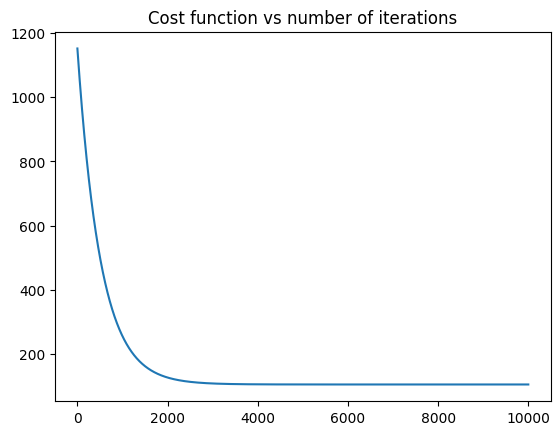

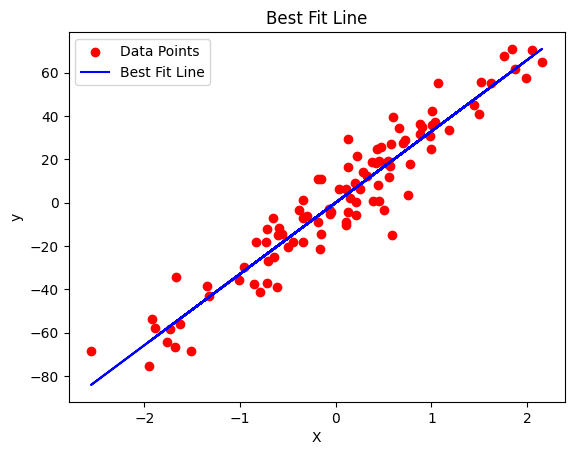

In [ ]:
# Plot the cost function over iterations

plt.plot(np.arange(num_iterations), cost_history)
plt.title('Cost function vs number of iterations')
plt.show()

# Plot the best fit line
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, np.dot(X, theta), color='blue', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

##Question 2 - CodeRunner: Regression Rumble II

The Logistic Regression algorithm is similar to Linear Regression minus the introdiction of a sigmoid activation function.

We also use the Binary Cross Entropy Cost function istead of MSE.

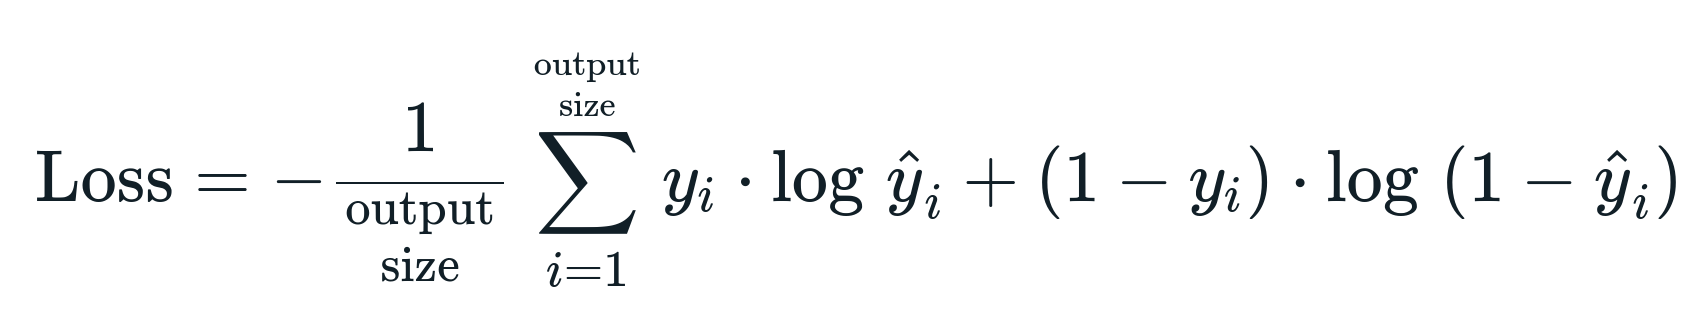


In [ ]:
# Generate random classification data using scikit-learn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

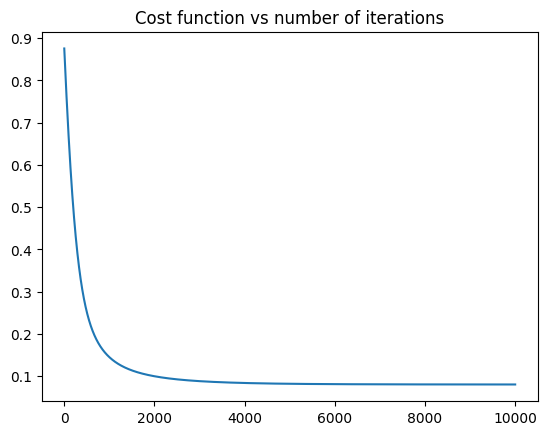

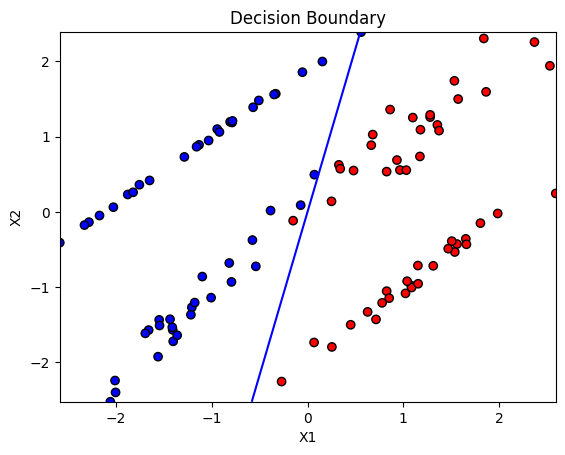

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def sigmoid(z):
    return 1/(1 + np.exp(-1*z))

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initialize parameters: theta
    theta = np.random.randn(2).reshape(2, 1)

    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted probabilities using the sigmoid function.
        predictions = sigmoid(np.matmul(X, theta))

        # Calculate the error: y_pred - y
        error = predictions - y[:, np.newaxis]

        # Calculate the gradients:
        gradients = np.sum(X*error)/m

        # Update parameters:
        theta -= learning_rate * gradients

        # Calculate the cost function: log loss
        cost = -1*sum(y[:,np.newaxis]*np.log(predictions) + (1-y[:,np.newaxis])*np.log(1-predictions))/m
        cost_history.append(cost)

    return theta, cost_history

# Generate random classification data using scikit-learn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Set the learning rate and number of iterations
learning_rate = 0.0025
num_iterations = 10000

# Call the logistic_regression function and store the results
theta, cost_history = logistic_regression(X, y, learning_rate, num_iterations)

# Plot the cost function over iterations
plt.plot(np.arange(num_iterations), cost_history)
plt.title('Cost function vs number of iterations')
plt.show()

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
'...'

plt.title('Decision Boundary')
plt.show()

## Question 3
Implement logistic regression using "Stochastic gradient descent" and use iris-dataset as training data.

The word ‘stochastic‘ means a system or process linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. In Gradient Descent, there is a term called “batch” which denotes the total number of samples from a dataset that is used for calculating the gradient for each iteration. In typical Gradient Descent optimization, like Batch Gradient Descent, the batch is taken to be the whole dataset. Although using the whole dataset is really useful for getting to the minima in a less noisy and less random manner, the problem arises when our dataset gets big.
Suppose, you have a million samples in your dataset, so if you use a typical Gradient Descent optimization technique, you will have to use all of the one million samples for completing one iteration while performing the Gradient Descent, and it has to be done for every iteration until the minima are reached. Hence, it becomes computationally very expensive to perform.
This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

    Stochastic Gradient Descent (SGD) is a variant of the Gradient Descent algorithm used for optimizing machine learning models. In this variant, only one random training example is used to calculate the gradient and update the parameters at each iteration. Here are some of the advantages and disadvantages of using SGD:

Advantages:

Speed: SGD is faster than other variants of Gradient Descent such as Batch Gradient Descent and Mini-Batch Gradient Descent since it uses only one example to update the parameters.

Memory Efficiency: Since SGD updates the parameters for each training example one at a time, it is memory-efficient and can handle large datasets that cannot fit into memory.

Avoidance of Local Minima: Due to the noisy updates in SGD, it has the ability to escape from local minima and converge to a global minimum.

Disadvantages:

Noisy updates: The updates in SGD are noisy and have a high variance, which can make the optimization process less stable and lead to oscillations around the minimum.

Slow Convergence: SGD may require more iterations to converge to the minimum since it updates the parameters for each training example one at a time.

Sensitivity to Learning Rate: The choice of learning rate can be critical in SGD since using a high learning rate can cause the algorithm to overshoot the minimum, while a low learning rate can make the algorithm converge slowly.

Less Accurate: Due to the noisy updates, SGD may not converge to the exact global minimum and can result in a suboptimal solution.




So, in SGD, we find out the gradient of the cost function of a single example at each iteration instead of the sum of the gradient of the cost function of all the examples.

In SGD, since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the minima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter all that much because the path taken by the algorithm does not matter, as long as we reach the minima and with a significantly shorter training time.

<ipython-input-4-a0e58ca6b504>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset = np.array(dataset)


epoch = 1.0: current_cost =  75.0
epoch = 2.0: current_cost =  21.76313917467295
epoch = 3.0: current_cost =  20.208116004511123
epoch = 4.0: current_cost =  20.02760000892504
epoch = 5.0: current_cost =  20.00235925795548
epoch = 6.0: current_cost =  19.999233189726315
epoch = 7.0: current_cost =  19.998809310565864
epoch = 8.0: current_cost =  19.998752395023462
epoch = 9.0: current_cost =  19.99874504469753
epoch = 10.0: current_cost =  19.998744222845986
epoch = 11.0: current_cost =  19.998744103836373
epoch = 12.0: current_cost =  19.99874408803184
epoch = 13.0: current_cost =  19.998744085820068
epoch = 14.0: current_cost =  19.99874408550014
epoch = 15.0: current_cost =  19.99874408546611


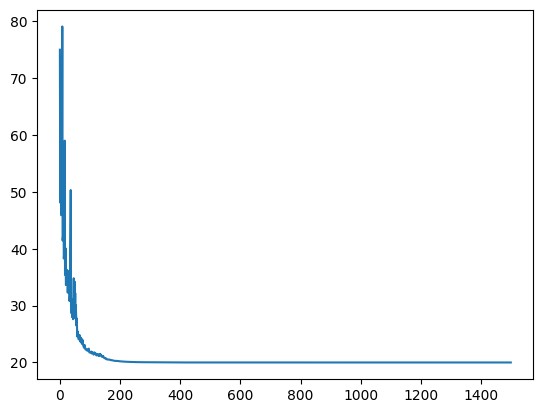

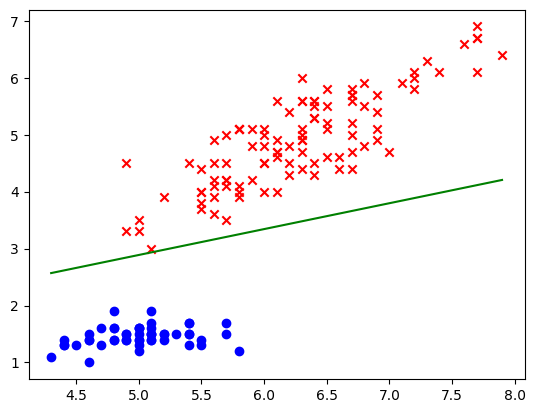

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False F

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

# pre load sklearn iris datasets
from sklearn import datasets
iris = '...'

X = iris.data
Y = iris.target

dataset = []

target_label = 0 # choose the target label of flower type
for index, x in enumerate(X):
    transform_label = None
    if:
      '...'
    else:
        '...'
    x = [x[0], x[2]]
    dataset.append((x,transform_label))

dataset = np.array(dataset)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sgd(dataset, w):
    #run sgd randomly
    index = random.randint(0, len(dataset) - 1)
    '...'

def cost(dataset, w):
    total_cost = 0
    for x,y in dataset:
       '...'
    return '...'

def logistic_regression(dataset):
    w = np.zeros(2)
    limit = 1500 #update times
    eta = 0.1 #update rate
    costs = []
    for i in range(limit):
        '...'
        eta = eta * 0.98 #decrease update rate
    plt.plot(range(limit), costs)
    plt.show()
    return w,(limit, costs)

def main():
    #execute
    w = logistic_regression(dataset)
    #draw
    ps = [v[0] for v in dataset]
    label = [v[1] for v in dataset]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    #plot via label
    tpx=[]
    for index, label_value in enumerate(label):
        px=ps[index][0]
        py=ps[index][1]
        tpx.append(px)
        if label_value == 1:
            ax1.scatter(px, py, c='b', marker="o", label='O')
        else:
            ax1.scatter(px, py, c='r', marker="x", label='X')

    l = np.linspace(min(tpx),max(tpx))
    a,b = (-w[0][0]/w[0][1], w[0][0])
    ax1.plot(l, a*l + b, 'g-')
    #plt.legend(loc='upper left');
    plt.show()

    limit = w[1][0]
    costs = w[1][1]
    w = w[0]

    # calculate score
    predicted_Y=[]
    answer_Y=[]
    for X,Y in dataset:
        '...'
    predicted_Y = np.asarray(predicted_Y)
    predicted_Y = predicted_Y > 0.5
    print(answer_Y)
    print(predicted_Y)


if __name__ == '__main__':
    main()


## Question 4

In this question you are supposed to implement Linear Regression using 'Mini Batch' Gradient Descent.

Mini-Batch Gradient Descent: Parameters are updated after computing the gradient of  the error with respect to a subset of the training set.
Thus, mini-batch gradient descent makes a compromise between the speedy convergence and the noise associated with gradient update which makes it a more flexible and robust algorithm.


 Mini-Batch Gradient Descent: Algorithm-

    Let theta = model parameters and max_iters = number of epochs. for itr = 1, 2, 3, …, max_iters:       for mini_batch (X_mini, y_mini):

        Forward Pass on the batch X_mini:
            Make predictions on the mini-batch
            Compute error in predictions (J(theta)) with the current values of the parameters
        Backward Pass:
            Compute gradient(theta) = partial derivative of J(theta) w.r.t. theta
        Update parameters:
            theta = theta – learning_rate*gradient(theta)

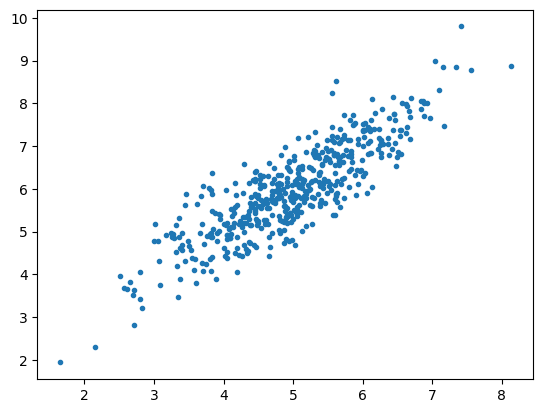

Bias =  [0.79371805]
Coefficients =  [[1.02394306]]


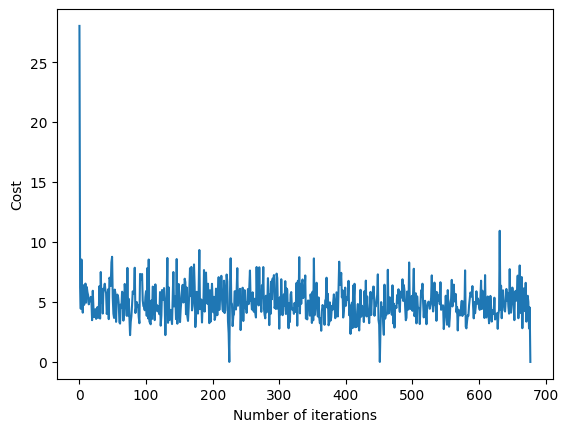

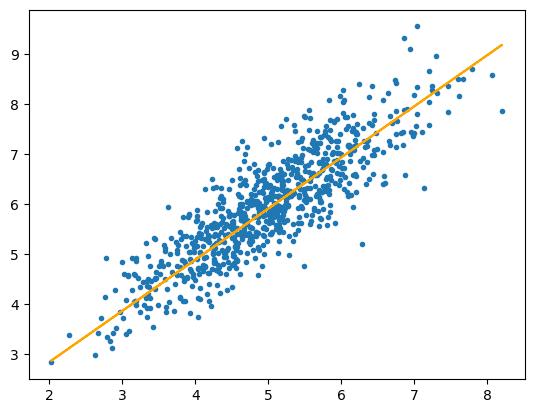

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 8000)

# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker='.')
plt.show()

# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))

split_factor = 0.90
split = int(split_factor * data.shape[0])

X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))



# linear regression using "mini-batch" gradient descent
# function to compute hypothesis / predictions


def hypothesis(X, theta):
	return '...'

# function to compute gradient of error function w.r.t. theta


def gradient(X, y, theta):
	'...'

# function to compute the error for current values of theta


def cost(X, y, theta):
	'...'

# function to create a list containing mini-batches


def create_mini_batches(X, y, batch_size):
	mini_batches = []
	data = np.hstack((X, y))
	np.random.shuffle(data)
	n_minibatches = data.shape[0] // batch_size
	i = 0

	for i in range(n_minibatches + 1):
		'...'
	if data.shape[0] % batch_size != 0:
		'...'
	return '...'

# function to perform mini-batch gradient descent


def gradientDescent(X, y, learning_rate=0.001, batch_size=32):
	'...'


theta, error_list = gradientDescent(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()


# predicting output for X_test
y_pred = hypothesis(X_test, theta)
plt.scatter(X_test[:, 1], y_test[:, ], marker='.')
plt.plot(X_test[:, 1], y_pred, color='orange')
plt.show()

# calculating error in predictions
error = '...'


